## Delta[HHB2] Fitting

In [1]:
import pandas as pd
import glob
import os
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Read Simulation data

In [3]:
csv_folder = '/content/drive/MyDrive/MCX_data/result_folder'
GT_folder = '/content/drive/MyDrive/MCX_data/csv'

In [4]:
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))
df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [5]:
df_all.head()

,ID,Uac_1_1,Udc_1_1,Phase_1_1,Uac_1_2,Udc_1_2,Phase_1_2,Uac_1_3,Udc_1_3,Phase_1_3,...,Phase_4_5,Uac_4_6,Udc_4_6,Phase_4_6,Uac_4_7,Udc_4_7,Phase_4_7,Uac_4_8,Udc_4_8,Phase_4_8
0,1,0.000630,0.000665,-0.501516,0.000645,0.000680,-0.494211,0.000654,0.000687,-0.479320,...,-0.956285,0.000022,0.000024,-0.938081,0.000022,0.000024,-0.907132,0.000022,0.000024,-0.899211
1,2,0.000659,0.000704,-0.528213,0.000675,0.000720,-0.520862,0.000685,0.000727,-0.505208,...,-1.018659,0.000027,0.000030,-1.001600,0.000027,0.000030,-0.971622,0.000027,0.000030,-0.959532
2,3,0.000677,0.000730,-0.549963,0.000693,0.000747,-0.542363,0.000704,0.000755,-0.526124,...,-1.077448,0.000031,0.000035,-1.060109,0.000031,0.000035,-1.031858,0.000032,0.000035,-1.016267
3,4,0.000686,0.000749,-0.566580,0.000703,0.000766,-0.558862,0.000714,0.000773,-0.542014,...,-1.130043,0.000034,0.000039,-1.111908,0.000034,0.000039,-1.084599,0.000035,0.000040,-1.067255
4,5,0.000691,0.000761,-0.578840,0.000708,0.000778,-0.570998,0.000719,0.000785,-0.553765,...,-1.176073,0.000036,0.000042,-1.156740,0.000037,0.000043,-1.129599,0.000037,0.000043,-1.110989


In [6]:
csv_files = glob.glob(os.path.join(GT_folder, '*.csv'))
GT_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [7]:
GT_all.head

<bound method NDFrame.head of           ID  HBO1  HHB1  HBO2  HHB2  Thickness  complete
0      43925  12.5   7.5    40    25         18     False
1      43926  12.5   7.5    40    25         20     False
2      43927  12.5   7.5    40    27         10     False
3      43928  12.5   7.5    40    27         12     False
4      43929  12.5   7.5    40    27         14     False
...      ...   ...   ...   ...   ...        ...       ...
87841  10977   6.5   6.5    28    21         14     False
87842  10978   6.5   6.5    28    21         16     False
87843  10979   6.5   6.5    28    21         18     False
87844  10980   6.5   6.5    28    21         20     False
87845  10981   6.5   6.5    28    23         10     False

[87846 rows x 7 columns]>

### Merge data

In [8]:
GT_all['ID'] = GT_all['ID'].astype(int)
df_all['ID'] = df_all['ID'].astype(int)
GT_all = GT_all.sort_values('ID').reset_index(drop=True)
df_all = df_all.sort_values('ID').reset_index(drop=True)

In [9]:
merged_df = pd.merge(df_all, GT_all, on='ID', how='inner')

In [10]:
merged_df.head

<bound method NDFrame.head of       ID   Uac_1_1   Udc_1_1  Phase_1_1   Uac_1_2   Udc_1_2  Phase_1_2  \
0      1  0.000630  0.000665  -0.501516  0.000645  0.000680  -0.494211   
1      2  0.000659  0.000704  -0.528213  0.000675  0.000720  -0.520862   
2      3  0.000677  0.000730  -0.549963  0.000693  0.000747  -0.542363   
3      4  0.000686  0.000749  -0.566580  0.000703  0.000766  -0.558862   
4      5  0.000691  0.000761  -0.578840  0.000708  0.000778  -0.570998   
..   ...       ...       ...        ...       ...       ...        ...   
155  156  0.000692  0.000766  -0.584238  0.000710  0.000784  -0.576365   
156  157  0.000611  0.000640  -0.482166  0.000627  0.000656  -0.475665   
157  158  0.000649  0.000687  -0.513365  0.000665  0.000703  -0.506709   
158  159  0.000671  0.000719  -0.538951  0.000688  0.000736  -0.531871   
159  160  0.000683  0.000741  -0.558647  0.000700  0.000758  -0.551327   

      Uac_1_3   Udc_1_3  Phase_1_3  ...  Phase_4_7   Uac_4_8   Udc_4_8  \
0    0.000654  0.000687  -0.479320  ...  -0.907132  0.000022  0.000024   
1    0.000685  0.000727  -0.505208  ...  -0.971622  0.000027  0.000030   
2    0.000704  0.000755  -0.526124  ...  -1.031858  0.000032  0.000035   
3    0.000714  0.000773  -0.542014  ...  -1.084599  0.000035  0.000040   
4    0.000719  0.000785  -0.553765  ...  -1.129599  0.000037  0.000043   
..        ...       ...        ...  ...        ...       ...       ...   
155  0.000721  0.000791  -0.559077  ...  -1.152303  0.000038  0.000045   
156  0.000636  0.000663  -0.462100  ...  -0.857792  0.000020  0.000021   
157  0.000675  0.000711  -0.492039  ...  -0.930810  0.000025  0.000027   
158  0.000698  0.000744  -0.516378  ...  -0.998481  0.000030  0.000033   
159  0.000711  0.000766  -0.534975  ...  -1.057558  0.000034  0.000038   

     Phase_4_8  HBO1  HHB1  HBO2  HHB2  Thickness  complete  
0    -0.899211   5.0   2.5    25    15         10     False  
1    -0.959532   5.0   2.5    25    15         12     False  
2    -1.016267   5.0   2.5    25    15         14     False  
3    -1.067255   5.0   2.5    25    15         16     False  
4    -1.110989   5.0   2.5    25    15         18     False  
..         ...   ...   ...   ...   ...        ...       ...  
155  -1.132938   5.0   2.5    31    21         20     False  
156  -0.853066   5.0   2.5    31    23         10     False  
157  -0.921109   5.0   2.5    31    23         12     False  
158  -0.984520   5.0   2.5    31    23         14     False  
159  -1.041142   5.0   2.5    31    23         16     False  

[160 rows x 103 columns]>

In [11]:
X = merged_df[df_all.columns.difference(['ID'])]
Y = merged_df[['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']]

In [12]:
X

,Phase_1_1,Phase_1_2,Phase_1_3,Phase_1_4,Phase_1_5,Phase_1_6,Phase_1_7,Phase_1_8,Phase_2_1,Phase_2_2,...,Udc_3_7,Udc_3_8,Udc_4_1,Udc_4_2,Udc_4_3,Udc_4_4,Udc_4_5,Udc_4_6,Udc_4_7,Udc_4_8
0,-0.501516,-0.494211,-0.479320,-0.466597,-0.453209,-0.442392,-0.434354,-0.426198,-0.693509,-0.685174,...,0.000069,0.000069,0.000024,0.000026,0.000025,0.000025,0.000024,0.000024,0.000024,0.000024
1,-0.528213,-0.520862,-0.505208,-0.492353,-0.478282,-0.467212,-0.458873,-0.450206,-0.736003,-0.725650,...,0.000080,0.000081,0.000030,0.000032,0.000031,0.000031,0.000030,0.000030,0.000030,0.000030
2,-0.549963,-0.542363,-0.526124,-0.513049,-0.498408,-0.487087,-0.478677,-0.469506,-0.772475,-0.760532,...,0.000090,0.000091,0.000035,0.000037,0.000036,0.000036,0.000036,0.000035,0.000035,0.000035
3,-0.566580,-0.558862,-0.542014,-0.528792,-0.513907,-0.502234,-0.494043,-0.484335,-0.802565,-0.789521,...,0.000098,0.000099,0.000039,0.000041,0.000040,0.000040,0.000040,0.000039,0.000039,0.000040
4,-0.578840,-0.570998,-0.553765,-0.540315,-0.525392,-0.513456,-0.505478,-0.495419,-0.825953,-0.812318,...,0.000103,0.000105,0.000043,0.000045,0.000044,0.000044,0.000044,0.000042,0.000043,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.584238,-0.576365,-0.559077,-0.545656,-0.530728,-0.518724,-0.510897,-0.500731,-0.836362,-0.822579,...,0.000106,0.000108,0.000044,0.000047,0.000045,0.000045,0.000045,0.000044,0.000045,0.000045
156,-0.482166,-0.475665,-0.462100,-0.450176,-0.437614,-0.427277,-0.419505,-0.411771,-0.660450,-0.654636,...,0.000062,0.000063,0.000020,0.000022,0.000021,0.000022,0.000021,0.000020,0.000020,0.000021
157,-0.513365,-0.506709,-0.492039,-0.479824,-0.466368,-0.455720,-0.447436,-0.439139,-0.709712,-0.701252,...,0.000075,0.000076,0.000026,0.000028,0.000028,0.000028,0.000028,0.000027,0.000027,0.000027
158,-0.538951,-0.531871,-0.516378,-0.503774,-0.489527,-0.478537,-0.470080,-0.461225,-0.752002,-0.741366,...,0.000086,0.000087,0.000032,0.000034,0.000033,0.000034,0.000033,0.000032,0.000032,0.000033


In [13]:
Y

,HBO1,HHB1,HBO2,HHB2,Thickness
0,5.0,2.5,25,15,10
1,5.0,2.5,25,15,12
2,5.0,2.5,25,15,14
3,5.0,2.5,25,15,16
4,5.0,2.5,25,15,18
...,...,...,...,...,...
155,5.0,2.5,31,21,20
156,5.0,2.5,31,23,10
157,5.0,2.5,31,23,12
158,5.0,2.5,31,23,14


In [14]:
X = X.to_numpy()
Y = Y.to_numpy()
Y = Y[:, 3]
Y = Y.reshape(-1, 1)

In [15]:
X.shape

(160, 96)

In [16]:
Y.shape

(160, 1)

### Create Data Pair: [X1 , X2] = Y1 - Y2

In [17]:
import numpy as np

# X shape: (160, 96)
# Y shape: (160, 1)

X_pairs = []
Y_diffs = []

for i in range(len(X)):
    for j in range(len(X)):
        # Concatenate X[i] and X[j] → shape (192,)
        x_pair = np.concatenate([X[i], X[j]])
        y_diff = Y[i, 0] - Y[j, 0]  # scalar

        X_pairs.append(x_pair)
        Y_diffs.append(y_diff)

# Convert to arrays
X_new = np.array(X_pairs)       # Shape: (25600, 192)
Y_new = np.array(Y_diffs).reshape(-1, 1)  # Shape: (25600, 1)

print(X_new.shape)  # (25600, 192)
print(Y_new.shape)  # (25600, 1)

(25600, 192)
(25600, 1)


### XGboost

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X_new, Y_new, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=2000,
    max_depth=16,
    learning_rate=0.05,
    tree_method='gpu_hist',  # Enable GPU acceleration
    predictor='gpu_predictor'
)

model.fit(X_train, y_train)

(20480, 192) (5120, 192) (20480, 1) (5120, 1)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:47] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:33:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, predictor='gpu_predictor', ...)

In [19]:
y_preds = np.column_stack([model.predict(X_test)])
mse = np.mean((y_preds - y_test)**2, axis=0)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:34:42] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [20]:
mse

array([0.70186335])

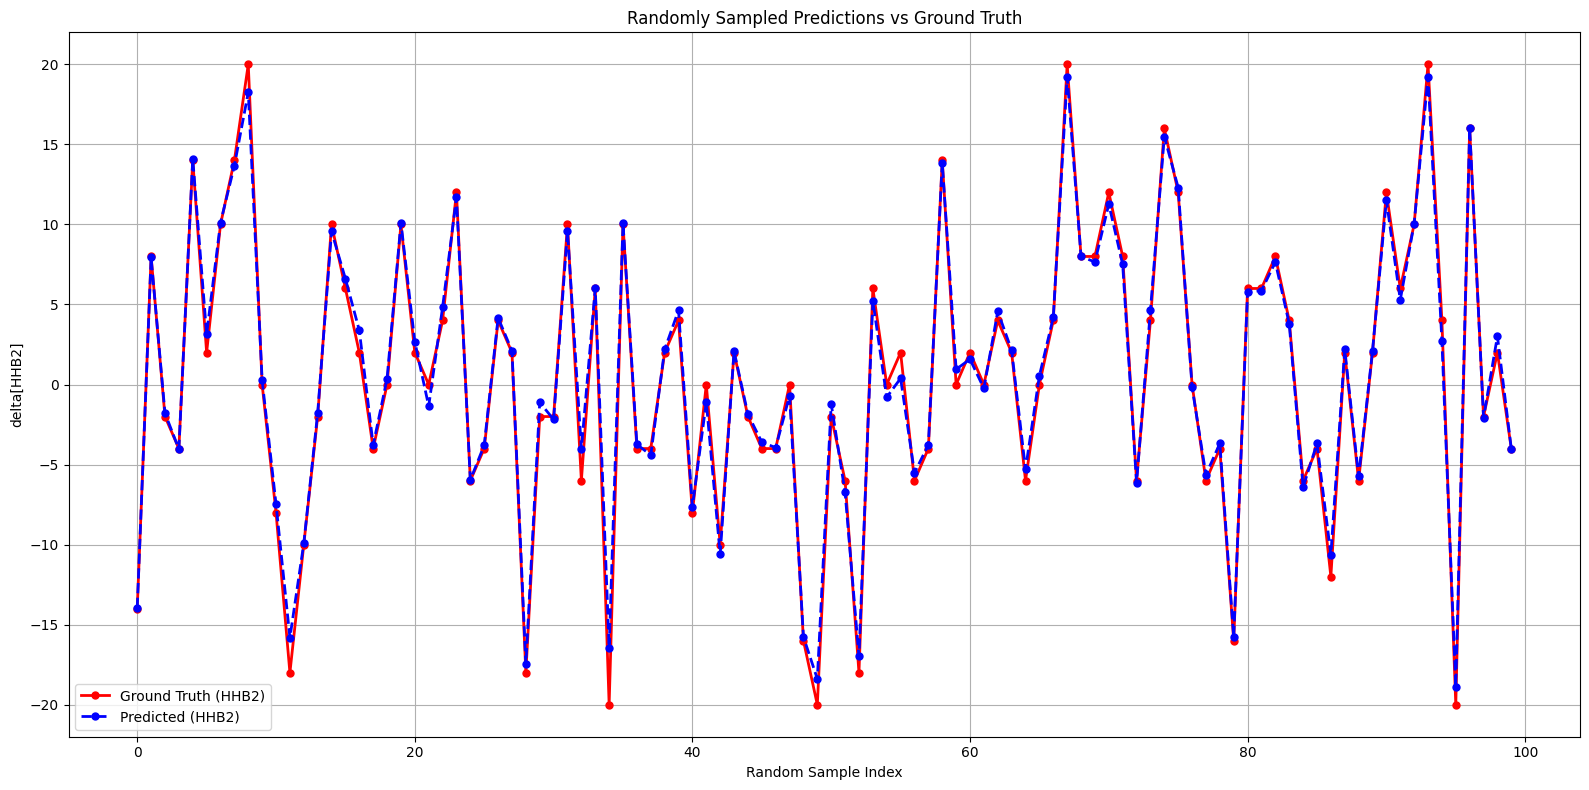

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)

# Randomly select 100 indices
indices = np.random.choice(len(y_test), size=100, replace=False)
indices = np.sort(indices)

# Extract corresponding values
y_test_sampled = y_test[indices]
y_pred_sampled = y_preds[indices]
# Plot with circular markers
plt.figure(figsize=(16, 8))
plt.plot(y_test_sampled, 'r-o', label='Ground Truth (HHB2)', linewidth=2, markersize=5)
plt.plot(y_pred_sampled, 'b--o', label='Predicted (HHB2)', linewidth=2, markersize=5)
plt.xlabel('Random Sample Index')
plt.ylabel('delta[HHB2]')
plt.title('Randomly Sampled Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

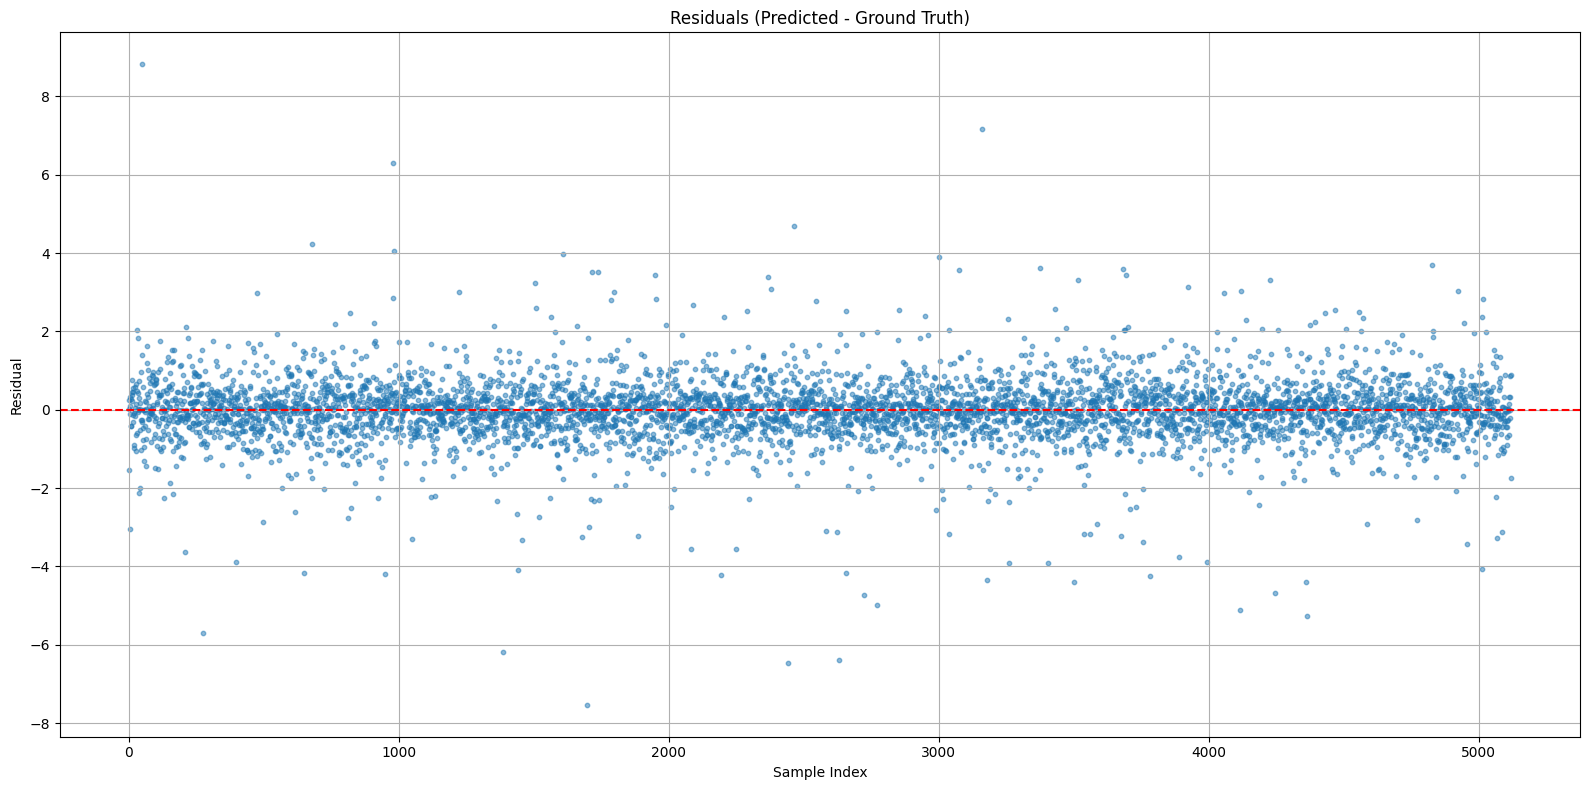

In [22]:
residuals = y_preds - y_test

plt.figure(figsize=(16, 8))
plt.scatter(range(len(residuals)), residuals, s=10, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Predicted - Ground Truth)")
plt.ylabel("Residual")
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=2000,      # Number of trees
    max_depth=16,           # Maximum depth of each tree
    random_state=42,
    n_jobs=-1               # Use all available CPU cores
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test MSE: 8.9897


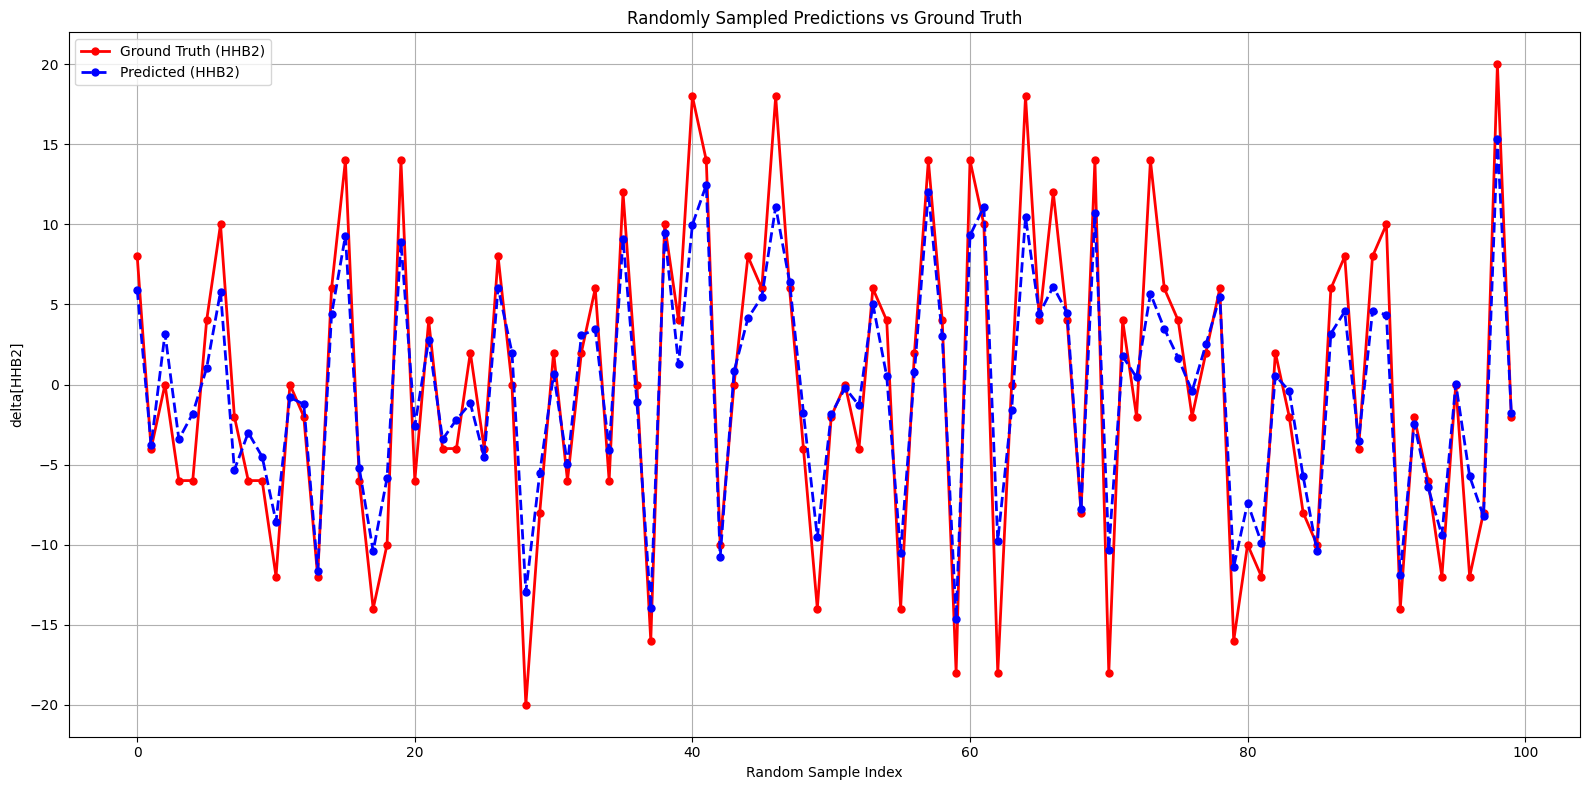

In [25]:
# Randomly select 100 indices
indices = np.random.choice(len(y_test), size=100, replace=False)
indices = np.sort(indices)

# Extract corresponding values
y_test_sampled = y_test[indices]
y_pred_sampled = y_pred[indices]
# Plot with circular markers
plt.figure(figsize=(16, 8))
plt.plot(y_test_sampled, 'r-o', label='Ground Truth (HHB2)', linewidth=2, markersize=5)
plt.plot(y_pred_sampled, 'b--o', label='Predicted (HHB2)', linewidth=2, markersize=5)
plt.xlabel('Random Sample Index')
plt.ylabel('delta[HHB2]')
plt.title('Randomly Sampled Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

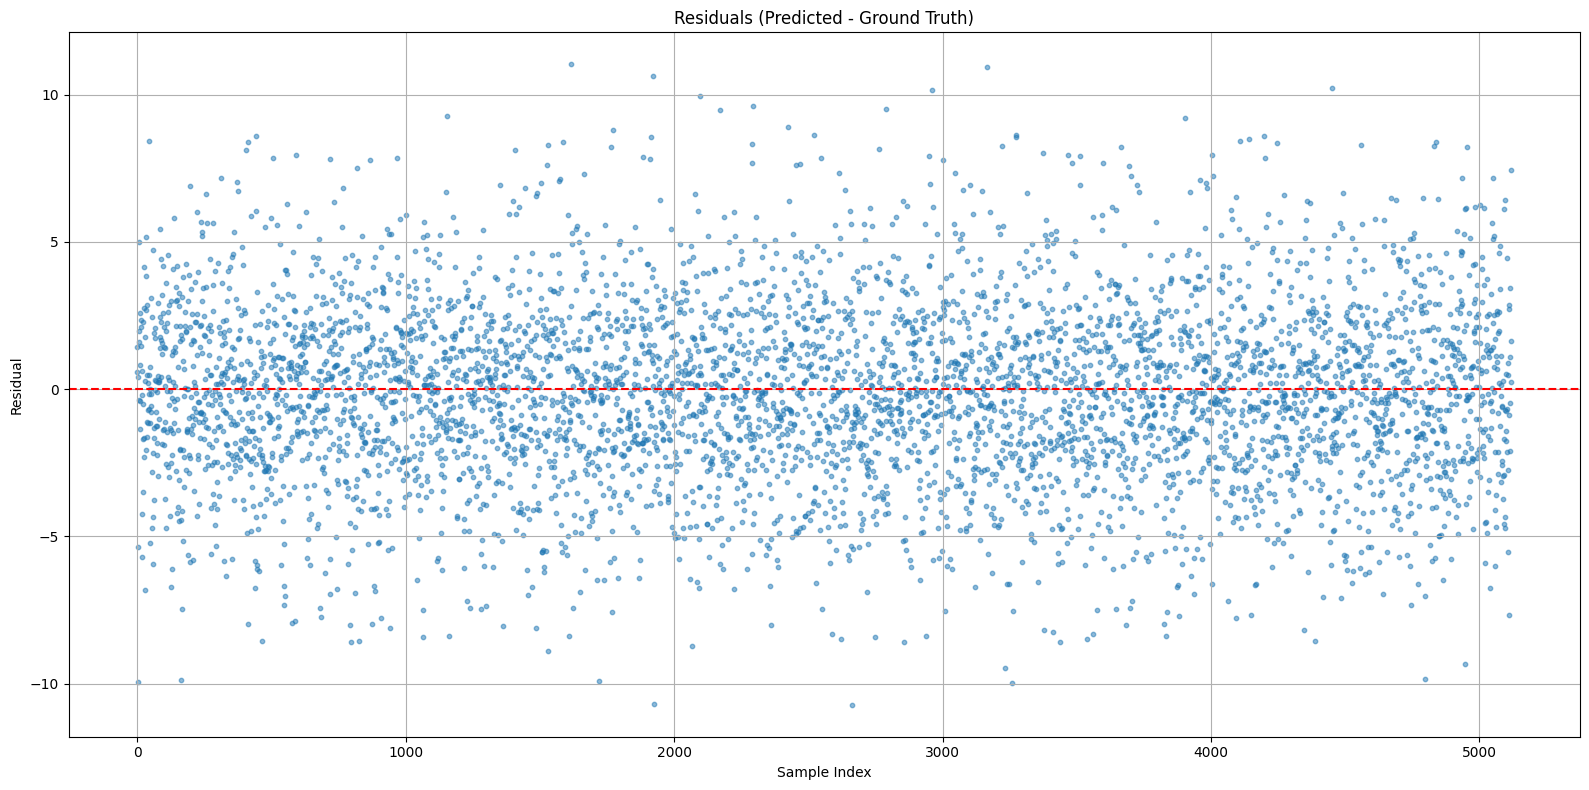

In [40]:
y_pred = y_pred.reshape(-1, 1)
residuals = y_pred - y_test
plt.figure(figsize=(16, 8))
plt.scatter(range(len(residuals)), residuals, s=10, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Predicted - Ground Truth)")
plt.ylabel("Residual")
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

### ANN

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.preprocessing import StandardScaler


# Fit scaler on training targets only
scaler_y = StandardScaler()
y_train_s = scaler_y.fit_transform(y_train)
y_test_s = scaler_y.transform(y_test)

scaler_X = StandardScaler()
X_train_s = scaler_X.fit_transform(X_train)
X_test_s = scaler_X.transform(X_test)

# Define ANN model
model = Sequential([
    Dense(192, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5)
model.compile(optimizer=optimizer, loss='mse')

# Train the model
history = model.fit(X_train_s, y_train_s, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Predict and evaluate
y_pred = model.predict(X_test_s)
mse = mean_squared_error(y_test_s, y_pred)
print(f"Test MSE: {mse:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


576/576 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.9728 - val_loss: 0.9256
Epoch 2/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8393 - val_loss: 0.6598
Epoch 3/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5373 - val_loss: 0.3257
Epoch 4/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2927 - val_loss: 0.1986
Epoch 5/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1836 - val_loss: 0.1352
Epoch 6/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1241 - val_loss: 0.1164
Epoch 7/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0987 - val_loss: 0.0748
Epoch 8/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0835 - val_loss: 0.0616
Epoch 9/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0681 - val_loss: 0.0637
Epoch 10/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0628 - val_loss: 0.0517
Epoch 11/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0520 - val_loss: 0.0586
Epoch 12/100
576/576 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

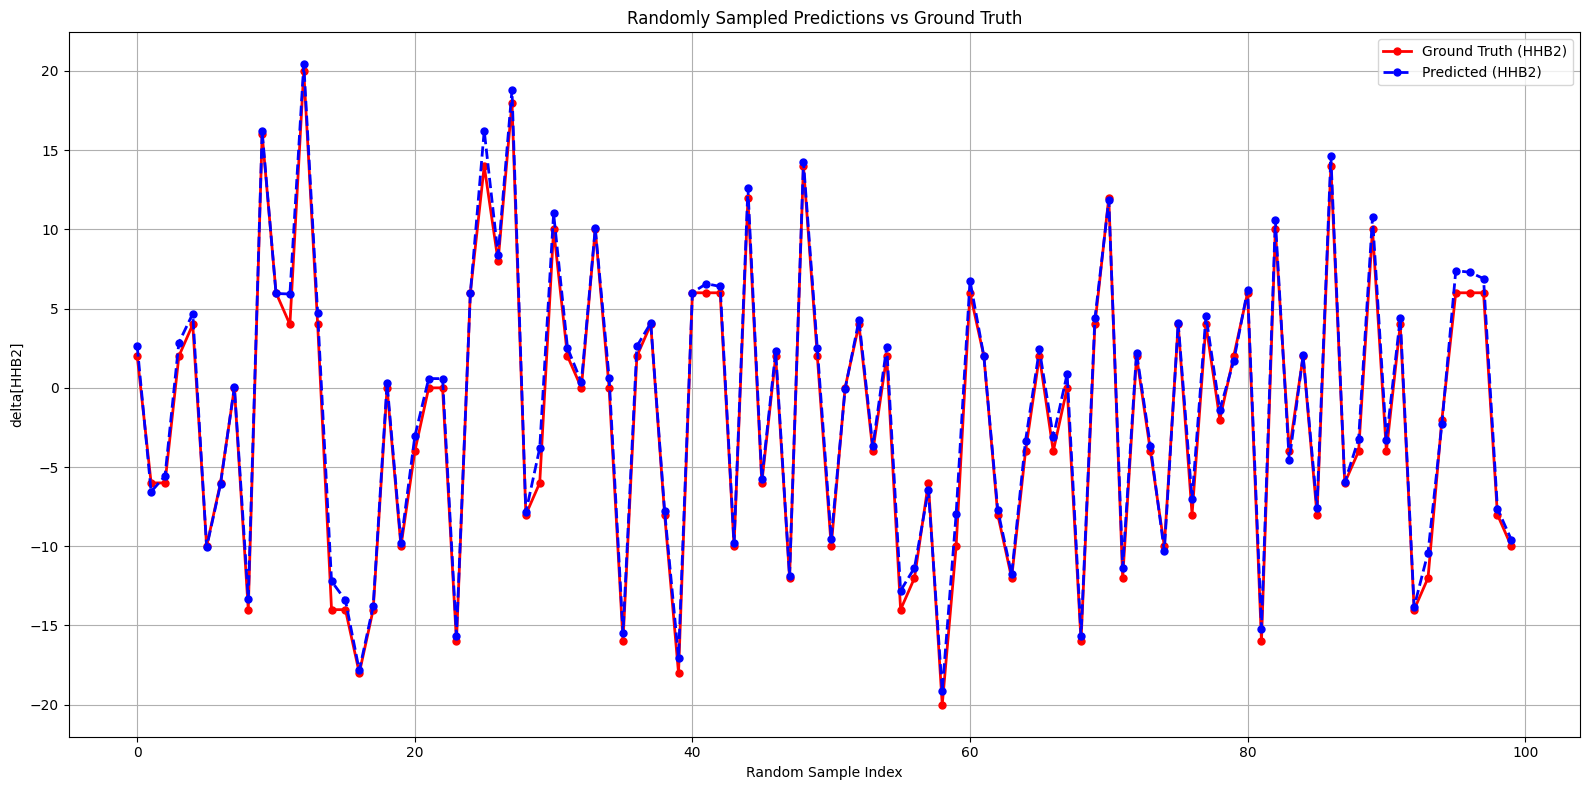

In [43]:
#y_pred = model.predict(X_test_s)

# Randomly select 100 indices
indices = np.random.choice(len(y_test_s), size=100, replace=False)
indices = np.sort(indices)

y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test_s.reshape(-1, 1)).flatten()

# Extract corresponding values
y_test_sampled = y_test_rescaled[indices]
y_pred_sampled = y_pred_rescaled[indices]

# Plot with circular markers
plt.figure(figsize=(16, 8))
plt.plot(y_test_sampled, 'r-o', label='Ground Truth (HHB2)', linewidth=2, markersize=5)
plt.plot(y_pred_sampled, 'b--o', label='Predicted (HHB2)', linewidth=2, markersize=5)
plt.xlabel('Random Sample Index')
plt.ylabel('delta[HHB2]')
plt.title('Randomly Sampled Predictions vs Ground Truth')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Test MSE (original scale): 0.4748


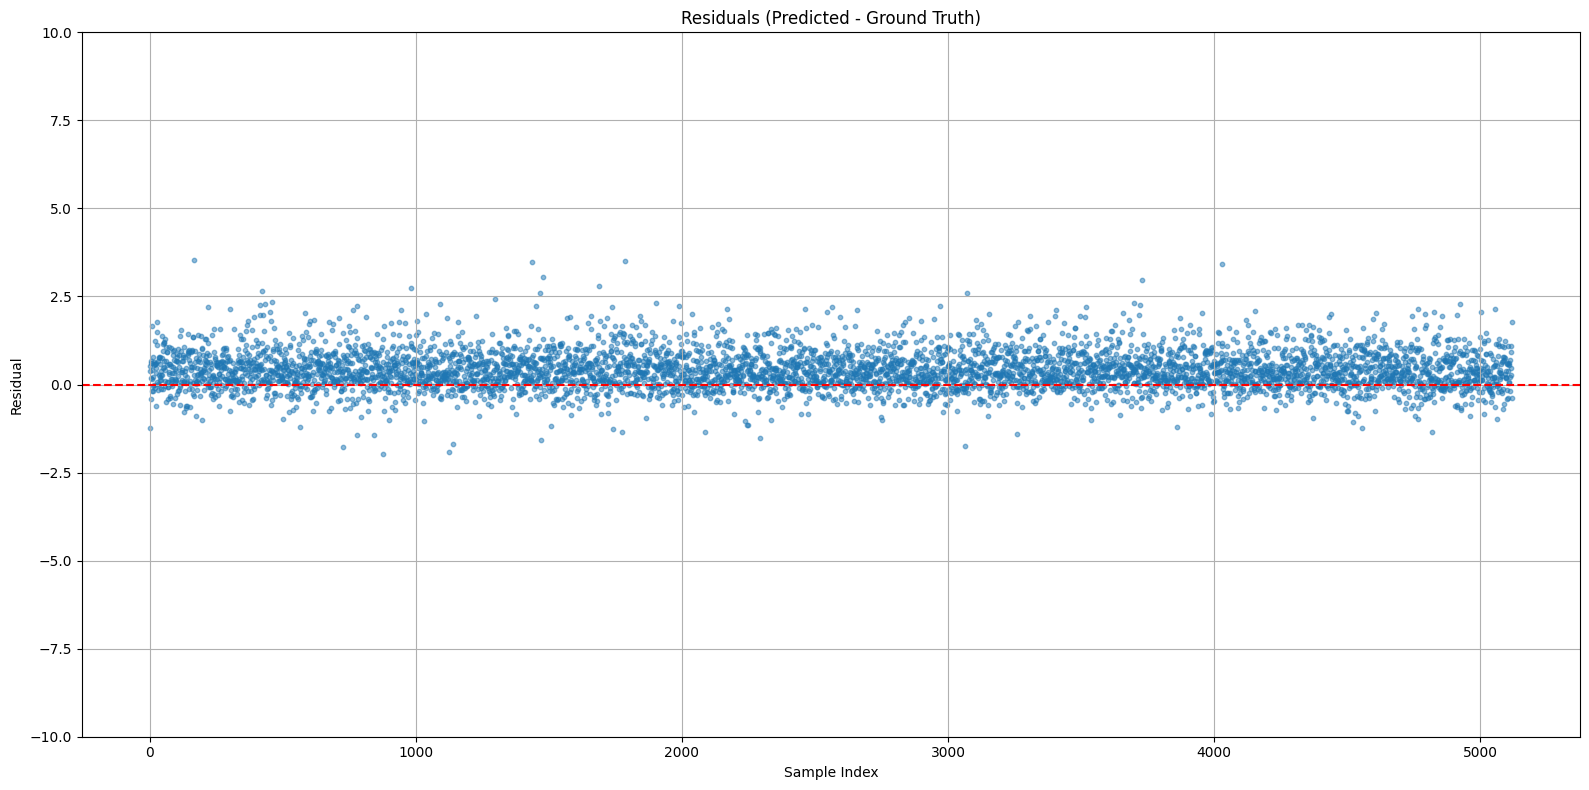

In [46]:
# Inverse-transform predictions and ground truth
y_pred_orig = scaler_y.inverse_transform(y_pred)       # shape (n, 1)
y_test_orig = scaler_y.inverse_transform(y_test_s)     # shape (n, 1)

# Compute residuals in original scale
residuals = y_pred_orig - y_test_orig

mse_rescaled = mean_squared_error(y_test_orig, y_pred_orig)
print(f"Test MSE (original scale): {mse_rescaled:.4f}")

# Plot residuals
plt.figure(figsize=(16, 8))
plt.scatter(range(len(residuals)), residuals, s=10, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals (Predicted - Ground Truth)")
plt.ylabel("Residual")
plt.ylim(-10, 10)
plt.xlabel("Sample Index")
plt.grid(True)
plt.tight_layout()
plt.show()

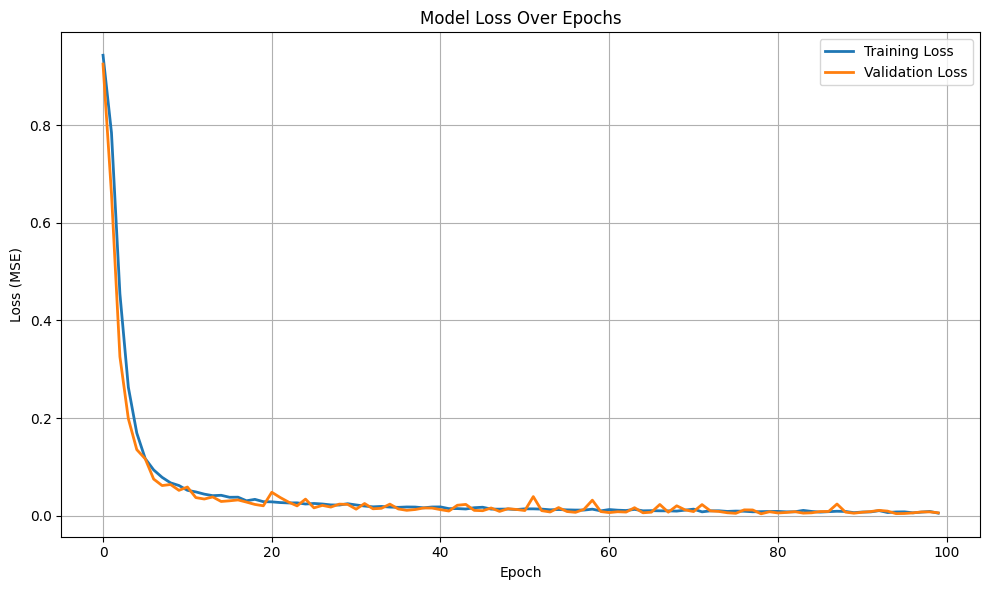

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss (MSE)')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
